In [45]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline
# General libraries.
import pandas as pd 
import re
import numpy as np
import matplotlib.pyplot as plt
# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *
from sklearn.cluster import KMeans

import nltk
from tqdm import tqdm

In [61]:
df = pd.read_csv('/Users/daphneyang/Desktop/5YMIDS_SP21/w266/266_final/nyt_data_collection/dataset/train_dataset.csv')[:1000]
df.head()

,headline,date,doc_type,material_type,section,abstract,first_paragraph,keywords,web_url
0,What Does a More Contagious Virus Mean for Sch...,2021-01-14,article,News,NaN,The coronavirus variant discovered in Britain ...,[Here’s how you can get the coronavirus vaccin...,"['your-feed-science', 'Coronavirus (2019-nCoV)...",https://www.nytimes.com/2021/01/14/health/coro...
1,They Talk About Porn in This Show. Audience Pa...,2018-03-16,article,News,NaN,"“Prurience,” a new immersive theater piece by ...",Christopher Green has been a fixture on the fr...,"['Theater', 'Pornography']",https://www.nytimes.com/2018/03/16/theater/pru...
2,Waiting for the Immigration Raids,2019-07-15,article,News,NaN,“The fear is there every single day.” We spoke...,Listen and subscribe to our podcast from your ...,"['Deportation', 'Illegal Immigration', 'Immigr...",https://www.nytimes.com/2019/07/15/podcasts/th...
3,Judge John Hodgman on Half-Empty Garbage Bags,2017-04-07,article,News,NaN,No amount of money saved is worth living with ...,Lauren writes: My husband says it’s wasteful t...,"['Comedy and Humor', 'Waste Materials and Disp...",https://www.nytimes.com/2017/04/07/magazine/ju...
4,A.I. Is Helping Scientists Understand an Ocean...,2020-04-08,article,News,NaN,Machine-learning applications are proving to b...,This article is part of our latest Artificial ...,"['Oceans and Seas', 'Water Pollution', 'Endang...",https://www.nytimes.com/2020/04/08/science/ai-...


In [127]:
## creating functions
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import string


def lemmatize_text(text):
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    lemmatizer = WordNetLemmatizer()
    lem_text = []
    for w in w_tokenizer.tokenize(text):
        lem_text.append(lemmatizer.lemmatize(w))
        lem_text.append(" ")
    return ''.join(lem_text)


def clean_text(text):
    """ Takes Text and does the following
    1. Remove Stopwords - remove common stopwords in English
    2. Removing Numbers -- may want to revisit this if numbers are important (thinking like covid cases and such)
    3. Lemmatizes Text - revert word to its base form (ex. studies, studying to study)
     """
    text = str(text)
    if len(text) <1:
        # if no available first paragraph
        return " "
    else:
        no_numbers = re.sub(r'[0-9]', "", text)
        no_punct = re.sub(r'[^\w\s]', '', no_numbers)
    # no_punct = [char for char in no_numbers if char not in string.punctuation]
    # no_punct = " ".join(no_punct)
    
    # no_punct = "".join(no_numbers)
    
        lower_text = [word.lower() for word in no_punct.split()
                  if word not in stopwords.words("english")]
        lower_text = ' '.join(lower_text)
        lemm_text = lemmatize_text(lower_text)
        if len(lemm_text) < 1:
        # in empty after regex
            return " "
        else:
            return lemm_text


In [128]:
text = "There are 4572 students in CS61B and CS1A."
no_numbers = re.sub(r'[0-9]', "", text)
no_punct = re.sub(r'[^\w\s]', '', no_numbers)
lower_text = [word.lower() for word in no_punct.split()
                if word not in stopwords.words("english")]
lower_text = ' '.join(lower_text)
lemm_text = lemmatize_text(lower_text).strip()
lemm_text

'there student csb csa'

In [130]:
## cleaning function
df['cleaned_first_paragraph'] = df['first_paragraph'].apply(clean_text)
df.head()

,headline,date,doc_type,material_type,section,abstract,first_paragraph,keywords,web_url,cleaned_first_paragraph
0,What Does a More Contagious Virus Mean for Sch...,2021-01-14,article,News,NaN,The coronavirus variant discovered in Britain ...,[Here’s how you can get the coronavirus vaccin...,"['your-feed-science', 'Coronavirus (2019-nCoV)...",https://www.nytimes.com/2021/01/14/health/coro...,here get coronavirus vaccine new york city
1,They Talk About Porn in This Show. Audience Pa...,2018-03-16,article,News,NaN,"“Prurience,” a new immersive theater piece by ...",Christopher Green has been a fixture on the fr...,"['Theater', 'Pornography']",https://www.nytimes.com/2018/03/16/theater/pru...,christopher green fixture fringier edge britis...
2,Waiting for the Immigration Raids,2019-07-15,article,News,NaN,“The fear is there every single day.” We spoke...,Listen and subscribe to our podcast from your ...,"['Deportation', 'Illegal Immigration', 'Immigr...",https://www.nytimes.com/2019/07/15/podcasts/th...,listen subscribe podcast mobile device via app...
3,Judge John Hodgman on Half-Empty Garbage Bags,2017-04-07,article,News,NaN,No amount of money saved is worth living with ...,Lauren writes: My husband says it’s wasteful t...,"['Comedy and Humor', 'Waste Materials and Disp...",https://www.nytimes.com/2017/04/07/magazine/ju...,lauren writes my husband say wasteful throw aw...
4,A.I. Is Helping Scientists Understand an Ocean...,2020-04-08,article,News,NaN,Machine-learning applications are proving to b...,This article is part of our latest Artificial ...,"['Oceans and Seas', 'Water Pollution', 'Endang...",https://www.nytimes.com/2020/04/08/science/ai-...,this article part latest artificial intelligen...


In [131]:
def compare_clean(idx):
    print(f"Row Number: {idx}\n")
    print(f"Original text: \n {df.first_paragraph[idx]} \n")
    print(f"Cleaned text: \n {df.cleaned_first_paragraph[idx]}")

In [132]:
compare_clean(6)

Row Number: 6

Original text: 
 SAN FRANCISCO — Apple customers have a lot to digest this summer. 

Cleaned text: 
 san francisco apple customer lot digest summer 


In [138]:
## Document Clustering using TFIDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df.cleaned_first_paragraph.to_list())

In [139]:
## Output of first 10 feature names from small training sample
print(vectorizer.get_feature_names()[:10])

['_________', 'aaron', 'aback', 'abandon', 'abandoned', 'abating', 'abbas', 'abbreviated', 'abcd', 'abe']


In [140]:
## Clustering
kmeans = KMeans(n_clusters=4)
kmeans_fit = kmeans.fit(X)
kmeans_fit

KMeans(n_clusters=4)

In [141]:
SSD = []
K = range(1,50)
for k in tqdm(K):
    km = KMeans(n_clusters = k)
    km = km.fit(X)
    SSD.append(km.inertia_)

100%|██████████| 49/49 [00:25<00:00,  1.93it/s]


Text(0.5, 1.0, 'Elbow Method For Optimal Clusters')

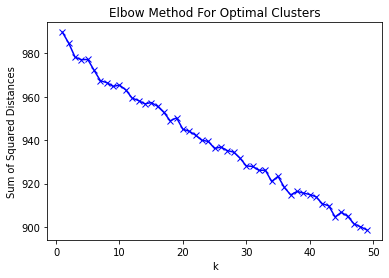

In [142]:
import matplotlib.pyplot as pyplot
plt.plot(K, SSD, "bx-")
plt.xlabel('k')
plt.ylabel("Sum of Squared Distances")
plt.title('Elbow Method For Optimal Clusters')